# Preparing Time Series from Wide-Form Data

## Data

Use the Home Value data set for the following:
  - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
  - Geography = "City"
  
It is available in  Zillow's publicly available Zillow House Value Index (ZHVI): https://www.zillow.com/research/data/.

Direct URL (for Pandas):
  - https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv

## Task

**Steps:**

Part 1: Prepare the dataset for time series analysis
  - Load in the Zillow Home Value Index dataframe.
  - Filter the 4 largest cities into a new dataframe.
  - Melt the data to long-form and prepare it for time series analysis. Convert the melted dates into datetime datatype and make the datetime column the index.
  - Resample the dataframe as monthly frequency, grouped by city.
  
Part 2: Plot and answer questions
  - Plot the home values for all 4 cities. Add a title and axis labels, and reformat the y-axis ticks to use thousands of dollars with a "K" at the end.
  - Answer the following 2 questions using pandas:
      - 1. Which city had the highest typical home value at the end of 2008? Which had the least?
      - 2. How much did the home values change from November 2008 to December 2008 (in dollars)?

# 0 Preliminary Steps

In [1]:
# imports
import pandas as pd
import matplotlib.ticker as mticks

# 1 Part 1: Prepare the dataset for time series analysis

## 1.1 Load in the Zillow Home Value Index dataframe

In [2]:
# load data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv')

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## 1.2  Filter the 4 largest cities into a new dataframe

The 'SizeRank' column has already ranked the cities by size where the larger the city, the smaller the rank value.

In [3]:
df = df[df['SizeRank'] <= 3].copy()

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 8.8+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## 1.3 Melt the data to long-form and prepare it for time series analysis

Convert the melted dates into datetime datatype and make the datetime column the index.

In [4]:
# check columns to see which to keep
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
# assign columns to keep to variable
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType',
           'StateName', 'State', 'Metro', 'CountyName']

# melt, rename 'variable' and 'value' columns
melted = pd.melt(df, 
                id_vars,
                value_name = 'HomePrice',
                var_name = 'Date')

# check
melted.info()
melted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   HomePrice   1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomePrice
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0


In [6]:
# convert the melted dates into datetime datatype
melted['Date'] = pd.to_datetime(melted['Date'])

# check
melted.info()
melted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomePrice   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomePrice
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0


In [7]:
# make the datetime column the index
melted = melted.set_index('Date')

# check
melted.info()
melted.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   HomePrice   1087 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomePrice
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


## 1.4 Resample the dataframe as monthly frequency, grouped by city

In [8]:
df_ts = melted.groupby('RegionName').resample('MS').sum(numeric_only = True)

# check
df_ts

RegionID  SizeRank  HomePrice
RegionName Date                                     
Chicago    2000-01-01     17426         3   166139.0
           2000-02-01     17426         3   166536.0
           2000-03-01     17426         3   167368.0
           2000-04-01     17426         3   168826.0
           2000-05-01     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-01      6181         0   768797.0
           2022-06-01      6181         0   773944.0
           2022-07-01      6181         0   777692.0
           2022-08-01      6181         0   779960.0
           2022-09-01      6181         0   781622.0

[1092 rows x 3 columns]

In [9]:
# drop unnecessary columns 'RegionID' and 'SizeRank'
df_ts = df_ts.drop(columns = ['RegionID', 'SizeRank'])

# check
df_ts

HomePrice
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

# 2 Part 2: Plot and answer questions

##  2.1 Plot the home values for all 4 cities

Add a title and axis labels, and reformat the y-axis ticks to use thousands of dollars with a "K" at the end.

In [10]:
# copy the data for plotting
plot_df = df_ts.copy()

# check
plot_df

HomePrice
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

In [11]:
# use unstack to make 'RegionName' part of index into columns
unstacked = plot_df.unstack(level = 0)

# check
unstacked

HomePrice                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

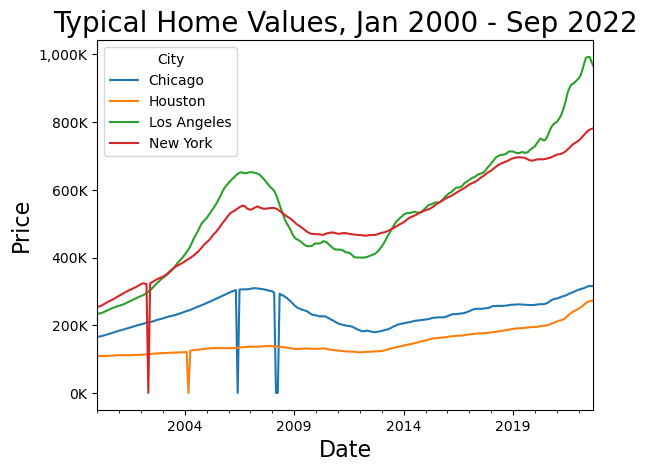

In [12]:
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# plot
ax = unstacked['HomePrice'].plot()

# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)

# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axis labels
ax.set_title('Typical Home Values, Jan 2000 - Sep 2022',
            fontsize = 20)
ax.set_ylabel('Price',
             fontsize = 16)
ax.set_xlabel('Date',
             fontsize = 16)

# change legend name
ax.legend(title = 'City');

## 2.2 Answer the following 2 questions using pandas

### 2.2.1 Question 1: Which city had the highest typical home value at the end of 2008? Which had the least?

In [13]:
# use pd.IndexSlice with the multi-index
dec_2008 = df_ts.loc[pd.IndexSlice[:, '2008-12-01'], :]

# view
dec_2008

,,HomePrice
RegionName,Date,
Chicago,2008-12-01,265306.0
Houston,2008-12-01,131283.0
Los Angeles,2008-12-01,469294.0
New York,2008-12-01,510309.0


In [14]:
# figure out highest value
dec_2008_max = dec_2008.idxmax()

# check
dec_2008_max

HomePrice    (New York, 2008-12-01 00:00:00)
dtype: object

In [15]:
# grab city of max
city = df_ts.loc[dec_2008_max].index[0][0]
city

'New York'

In [16]:
# grab value of max
value = df_ts.loc[pd.IndexSlice[city, '2008-12-01'], 'HomePrice']
value

510309.0

In [17]:
# make printout to answer question
print(f"{city} had the highest typical home value at the end of \
2008, with a typical home value of ${value:,.0f}.")

New York had the highest typical home value at the end of 2008, with a typical home value of $510,309.


In [18]:
# figure out the lowest value
dec_2008_min = dec_2008.idxmin()

# check
dec_2008_min

HomePrice    (Houston, 2008-12-01 00:00:00)
dtype: object

In [19]:
# grab city of min
city = df_ts.loc[dec_2008_min].index[0][0]
city

'Houston'

In [20]:
# grab value of min
value = df_ts.loc[pd.IndexSlice[city, '2008-12-01'], 'HomePrice']
value

131283.0

In [21]:
# make printout to answer question
print(f"{city} had the lowest typical home value at the end of \
2008, with a typical home value of ${value:,.0f}.")

Houston had the lowest typical home value at the end of 2008, with a typical home value of $131,283.


### 2.2.2 Question 2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [22]:
# figure out November 2008 average price
# use pd.IndexSlice with the multi-index
nov_2008 = df_ts.loc[pd.IndexSlice[:, '2008-11-01'], :]
nov_2008_avg = nov_2008.mean()

# check
nov_2008_avg = nov_2008_avg[0]
nov_2008_avg

349994.5

In [23]:
# figure out December 2008 average price
# use pd.IndexSlice with the multi-index
dec_2008 = df_ts.loc[pd.IndexSlice[:, '2008-12-01'], :]
dec_2008_avg = dec_2008.mean()

# check
dec_2008_avg = dec_2008_avg[0]
dec_2008_avg

344048.0

In [24]:
# calculate difference
diff = dec_2008_avg - nov_2008_avg

# check
diff

-5946.5

In [25]:
# make printout to answer question
print(f"The average home price in Los Angeles, New York, \
Houston, and Chicago changed from ${nov_2008_avg:,.0f} in \
November 2008 to ${dec_2008_avg:,.0f} in December 2008, for \
a difference of {diff:,.0f}.")

The average home price in Los Angeles, New York, Houston, and Chicago changed from $349,994 in November 2008 to $344,048 in December 2008, for a difference of -5,946.
